# Simulate a Gaussian random vector with Cholesky decomposition

In this document, we present the simulation of a random vector with arbitrary marginals and Gaussian copula. We assume that this copula has a full rank covariance matrix. We use the Cholesky decomposition to simulate the correlated Gaussian random vector.

## Introduction

The multivariate normal distribution of a k-dimensional random vector $\boldsymbol{X} = (X_1,\ldots,X_k)^T$ can be written in the following notation:

$$
\boldsymbol{X}\ \sim\ \mathcal{N}(\boldsymbol{\mu},\, \Sigma),
$$

where $\boldsymbol{\mu} \in \mathbb{R}^k$ is the mean vector and $\Sigma \in \mathbb{R}^{k\times k}$ is the covariance matrix.

## PDF

Assuming that $\Sigma$ has full rank, the probability density function is:

$$
f_{\boldsymbol{x}}(\boldsymbol{x}) = \frac{1}{\sqrt{(2\pi)^k  |\Sigma|}} \exp\left(-\frac 1 2 (\boldsymbol{x}-\boldsymbol{\mu})^\mathrm{T}{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right)
$$

for any $\boldsymbol{x}\in\mathbb{R}^k$. 

## Simulation

Let $L \in\mathbb{R}^{k\times k}$ by the Cholesky factor of $\boldsymbol\Sigma$ :

$$
\boldsymbol\Sigma = L L^T
$$

where $L$ is a lower triangular matrix. 

Let $\boldsymbol{Z} \in \mathbb{R}^k$ be the random vector with independent marginals, such that :

$$
Z_i \sim \mathcal{N}(0, 1)
$$

for $i=1,\ldots, k$. 

Therefore, 

$$
\boldsymbol{X} = \boldsymbol{\mu} + L \boldsymbol{Z} \sim \mathcal{N}(\boldsymbol\mu,\, \boldsymbol\Sigma).
$$

Indeed, its mean is :

$$
\mathbb{E}[\boldsymbol{X}] = \boldsymbol{\mu} + L  \mathbb{E}[\boldsymbol{Z}] = \boldsymbol{\mu}
$$

since $\mathbb{E}[\boldsymbol{Z}] = \boldsymbol{0}$.

Its covariance is:

$$
\textrm{Cov}[\boldsymbol{X}] = \textrm{Cov}[L \boldsymbol{Z}] = L \textrm{Cov}[\boldsymbol{Z}] L^T = L L^T = \boldsymbol\Sigma,
$$

by the properties of the covariance and the definition of $L$.

## Covariance matrix, correlation matrix and gaussian random vector

In order to define a gaussian random vector, we can use either its covariance matrix or its correlation matrix. 
The covariance matrix $\Sigma \in \mathbb{R}^{k \times k}$ has entries:
$$
\sigma_{i, j} = \operatorname{Cov}[X_i, X_j] = \mathbb{E}\big[\left(X_i - \mathbb{E}[X_i]\right)\left(X_j - \mathbb{E}[X_j]\right)\big]
$$
for $i, j = 1,..., k$.

The correlation matrix $R \in \mathbb{R}^{k \times k}$ has entries:
$$
r_{ij} = \rho(X_i, X_j) = \frac{\operatorname{Cov}[X_i, X_j]}{\sigma_i \sigma_j}
$$
for $i, j = 1, ..., k$ where $\sigma_i$ is the standard deviation:
$$
\sigma_i = \sqrt{\mathbb{V}(X_i)}.
$$

Hence, there are two possible choices to define a gaussian random vector:
- use the mean $\boldsymbol{\mu}$ and the covariance matrix $\Sigma$,
- use the mean $\boldsymbol{\mu}$, the standard deviations $\boldsymbol{SD} = (\sigma_1, ..., \sigma_k)$ and the correlation matrix $R$.

## Arbitrary marginals with Gaussian copula

Let $\mathbf{X}\in\mathbb{R}^k$ be a random vector with marginal cumulative density function $F_i$ for $i=1,\ldots, k$ and Gaussian copula with correlation matrix $R$. 

Let $\mathbf{Z}\in\mathbb{R}^k$ be a Gaussian random vector Gaussian copula with zero mean and correlation matrix $R$. The previous section shows how to simulate such a vector. 

Let $\mathbf{X}\in\mathbb{R}^k$ be the random vector defined by:

$$
X_i = F_i^{-1}\left(\Phi(Z_i)\right)
$$

for $i=1, \ldots, k$ where $\Phi$ is the standard normal cumulative density function (CDF) and $F_i^{-1}$ is the quantile function of the i-th marginal. 
Therefore, the random vector $\mathbf{X}$ has the required distribution. 

In other words, the previous method using the Cholesky decomposition defines a way to simulate a random vector having arbitrary marginals and a gaussian copula with given correlation matrix $R$. This is what is done in the implementation of the `NormalRandomVector`, where the random vector is defined with a list of univariate marginal distributions and a correlation matrix $R$. Perhaps a better name would be `RandomVectorWithNormalCopula`. 

In [1]:
import openturns as ot
import openturns.viewer as otv

In [2]:
ot.__version__

'1.17'

In [3]:
def view_sample(sample, title, figure_size=5.0):
    graph = ot.VisualTest.DrawPairs(sample)
    graph.setTitle(title)
    figure = otv.View(graph).getFigure()
    figure.set_figheight(figure_size)
    figure.set_figwidth(figure_size)
    return graph

In [4]:
ot.RandomGenerator.SetSeed(77)

In [5]:
# Liste des marginales
marginal_collection = [ot.Normal(3.0, 2.0), ot.Uniform(-3.0, -1.0), ot.Beta()]

In [6]:
# Dépendance
R = ot.CorrelationMatrix(3, [1.0, 0.5, 0.3, 0.5, 1.0, 0.9, 0.3, 0.9, 1.0])
print(R)
copula = ot.NormalCopula(R)
distribution = ot.ComposedDistribution(marginal_collection, copula)

[[ 1   0.5 0.3 ]
 [ 0.5 1   0.9 ]
 [ 0.3 0.9 1   ]]


In [7]:
# Simulation
sample_size = 100
sample = distribution.getSample(sample_size)
sample[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=3 description=[X0,X1,X2] data=[[5.4931,-1.45121,0.0571624],[2.02814,-1.82292,-0.143716],[1.89767,-2.19469,0.11227],[3.54756,-1.82015,0.19982],[1.03405,-2.33888,0.278309]]

/home/devel/miniconda3/envs/otsupgalilee/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/devel/miniconda3/envs/otsupgalilee/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


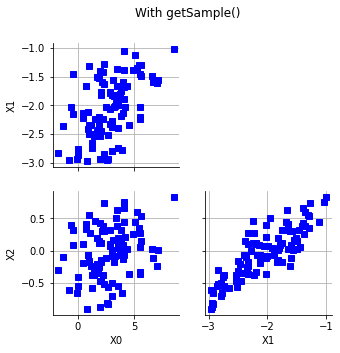

In [8]:
graph = view_sample(sample, "With getSample()")

In [9]:
# Create a gaussian random vector
dimension = R.getDimension()
mu = ot.Point(dimension)
sigma = ot.Point(dimension, 1.0)
distribution = ot.Normal(mu, sigma, R)
sample_z = distribution.getSample(sample_size)
sample_z[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=3 description=[X0,X1,X2] data=[[0.983271,0.970473,0.985844],[0.70507,-0.48126,-1.25494],[-2.20798,-1.65626,-0.630921],[-0.484814,-1.552,-1.50783],[2.07205,0.517512,0.290387]]

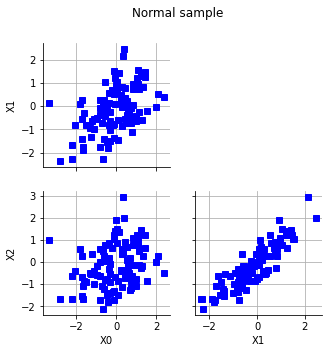

In [10]:
graph = view_sample(sample_z, "Normal sample")

In [11]:
# Simulation pas à pas
class NormalRandomVector(ot.PythonRandomVector):
    def __init__(self, marginal_collection, R):
        """
        Create a Normal random vector with arbitrary marginals.
        
        Parameters
        ----------
        marginal_collection : list
            The list of univariate marginals.
        R : ot.CorrelationMatrix
            The correlation matrix
        """
        dimension = len(marginal_collection)
        if R.getDimension() != dimension:
            raise ValueError(
                "Dimension of correlation matrix is %d, "
                "which is different from the number of "
                "marginal distributions."
                % (R.getDimension())
            )
        super(NormalRandomVector, self).__init__(dimension)
        self.R = R
        self.marginal_collection = marginal_collection
        # Compute correlated Normal realization
        self.L = R.computeCholesky()
        self.dimension = R.getDimension()
        

    def getRealization(self):
        """
        Generate a new realization with Gaussian copula.

        Uses the Cholesky decomposition of R.
        This implementation only if the covariance matrix 
        is full rank. 
        The point is generated by computing the quantile of the 
        CDF of the Gaussian correlated random vector.

        Returns
        -------
        x_correlated : ot.Point()
            The point with given correlation and marginals. 
        """
        # Generate a realization without correlation
        Z_distribution = ot.Normal(self.dimension)
        z_decorrelated = Z_distribution.getRealization()
        z_correlated = self.L * z_decorrelated
        # Apply marginals
        x_correlated = ot.Point(self.dimension)
        for i in range(self.dimension):
            marginal = self.marginal_collection[i]
            cdf = ot.Normal().computeCDF(z_correlated[i])
            x_correlated[i] = marginal.computeQuantile(cdf)[0]
        return x_correlated
    
    def getSample(self, size):
        """
        Generate a sample with Gaussian copula.

        Parameters
        ----------
        size : int
            The size of the sample.

        Returns
        -------
        sample : ot.Sample(size, dimension)
            The sample.
        """
        sample = ot.Sample(size, self.dimension)
        for i in range(size):
            sample[i] = self.getRealization()
        return sample

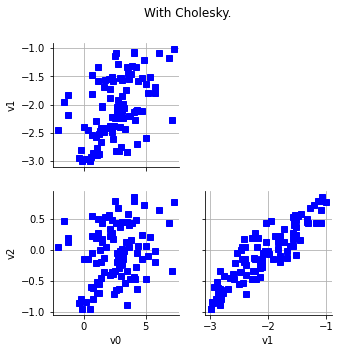

In [13]:
nrv = NormalRandomVector(marginal_collection, R)
randomvector = ot.RandomVector(nrv)

sample = randomvector.getSample(sample_size)

graph = view_sample(sample, "With Cholesky")